# Exploratory Data Analysis for Data Set B

# Step 1 - Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from google.colab import data_table

plt.rcParams["figure.figsize"] = (20,5)

In [ ]:
# Imported CompanyB.csv
CompanyB = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Collaborative App Dev/DatasetB.csv')
CompanyB = CompanyB[CompanyB['BookingStatus'] == 'Attending']

print(CompanyB.head())

                                           EventName         StartDate  \
0  University of London International Programmes ...  06/03/2018 00:00   
1  University of London International Programmes ...  06/03/2018 00:00   
2  University of London International Programmes ...  06/03/2018 00:00   
3  University of London International Programmes ...  06/03/2018 00:00   
4  University of London International Programmes ...  06/03/2018 00:00   

   EventType BookingReference AttendeeReference  GroupSize  IsLeadAttendee  \
0        NaN          B452158           A502856          2            True   
1        NaN          B452158           A502857          2           False   
2        NaN          B452162           A502861          3            True   
3        NaN          B452162           A502862          3           False   
4        NaN          B452162           A502863          3           False   

   AttendeeGrossCost  EventId BookingStatus AttendeeType         TicketType  \
0      

In [ ]:
def event_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['eventdayofweek'] = dfs.StartDate.dt.dayofweek
    dfs['eventquarter'] = dfs.StartDate.dt.quarter
    dfs['eventmonth'] = dfs.StartDate.dt.month
    dfs['eventyear'] = dfs.StartDate.dt.year
    dfs['eventdayofyear'] = dfs.StartDate.dt.dayofyear
    dfs['eventdayofmonth'] = dfs.StartDate.dt.day
    dfs['eventweekofyear'] = dfs.StartDate.dt.isocalendar().week
    return dfs

def Booking_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['Bookingdayofweek'] = dfs.StatusCreatedDate.dt.dayofweek
    dfs['Bookingquarter'] = dfs.StatusCreatedDate.dt.quarter
    dfs['Bookingmonth'] = dfs.StatusCreatedDate.dt.month
    dfs['Bookingyear'] = dfs.StatusCreatedDate.dt.year
    dfs['Bookingdayofyear'] = dfs.StatusCreatedDate.dt.dayofyear
    dfs['Bookingdayofmonth'] = dfs.StatusCreatedDate.dt.day
    dfs['Bookingweekofyear'] = dfs.StatusCreatedDate.dt.isocalendar().week
    return dfs

# Company B

In [ ]:
#Formating and adding new columns to the dataset
CompanyB['StatusCreatedDate'] = pd.to_datetime(CompanyB['StatusCreatedDate'], infer_datetime_format=True)
CompanyB['StartDate'] = pd.to_datetime(CompanyB['StartDate'], infer_datetime_format=True)
CompanyB['BookingDaysToEvent'] = abs((CompanyB['StartDate'] - CompanyB['StatusCreatedDate']).dt.days)
CompanyB['BookingWeeksToEvent'] = round(CompanyB['BookingDaysToEvent']/7,0)
CompanyB['Bookingweeknumber'] = pd.DatetimeIndex(CompanyB['StatusCreatedDate']).week
CompanyB['eventWeeknumber'] = pd.DatetimeIndex(CompanyB['StartDate']).week

# To create Season column
_condition_winter = (CompanyB.StartDate.dt.month>=1)&(CompanyB.StartDate.dt.month<=3)
_condtion_spring = (CompanyB.StartDate.dt.month>=4)&(CompanyB.StartDate.dt.month<=6)
_condition_summer = (CompanyB.StartDate.dt.month>=7)&(CompanyB.StartDate.dt.month<=9)
_condition_autumn = (CompanyB.StartDate.dt.month>=10)&(CompanyB.StartDate.dt.month<=12)

CompanyB['EventSeason'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

<ipython-input-9-38113a48715d>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  CompanyB['Bookingweeknumber'] = pd.DatetimeIndex(CompanyB['StatusCreatedDate']).week
<ipython-input-9-38113a48715d>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  CompanyB['eventWeeknumber'] = pd.DatetimeIndex(CompanyB['StartDate']).week


In [ ]:
CompanyB.head()
# data_table.DataTable(Company)

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,BookingDaysToEvent,BookingWeeksToEvent,Bookingweeknumber,eventWeeknumber,EventSeason
0,University of London International Programmes ...,2018-06-03,NaN,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,2017-10-26 10:12:00,249,219,31.0,43,22,Spring
1,University of London International Programmes ...,2018-06-03,NaN,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,2017-10-26 10:12:00,249,219,31.0,43,22,Spring
2,University of London International Programmes ...,2018-06-03,NaN,B452162,A502861,3,True,0,12445,Attending,Graduand,PM Ceremony,2017-10-26 10:16:00,249,219,31.0,43,22,Spring
3,University of London International Programmes ...,2018-06-03,NaN,B452162,A502862,3,False,50,12445,Attending,Guest,Guest PM Ceremony,2017-10-26 10:16:00,249,219,31.0,43,22,Spring
4,University of London International Programmes ...,2018-06-03,NaN,B452162,A502863,3,False,50,12445,Attending,Guest,Guest PM Ceremony,2017-10-26 10:16:00,249,219,31.0,43,22,Spring


In [ ]:
CompanyB['TicketType']=CompanyB['TicketType'].replace('AM Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Child (AM ceremony)','Child Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Child (PM ceremony)','Child Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Evening dinner ','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest AM Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest PM Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('PM Ceremony ','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('PM Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('121 Session','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('14:30 Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('11:00 Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest 14:30 Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest 17:00 Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest 11:00 Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('17:00 Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('13th Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('14th Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('15th Ceremony','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest 13th Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest 14th Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Guest 15th Ceremony','Adult Guest')
CompanyB['TicketType']=CompanyB['TicketType'].replace('3 day ticket am/pm','Standard')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Academic Ticket','Academic Staff')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Teaching Centre Staff','Academic Staff')
CompanyB['TicketType']=CompanyB['TicketType'].replace('Any day', 'Standard')

CompanyB['TicketType']=CompanyB['TicketType'].replace('Standard', 'Graduands')

2.0 EDA Tables

In [ ]:
Seaons_df = CompanyB.groupby(['EventSeason', 'EventId', 'BookingWeeksToEvent', 'TicketType']).aggregate({'GroupSize':'count'}).reset_index()
Seaons_df.head()

,EventSeason,EventId,BookingWeeksToEvent,TicketType,GroupSize
0,Autumn,21413,4.0,Graudants,1
1,Autumn,21413,5.0,Graudants,1
2,Spring,12445,1.0,Adult Guest,1
3,Spring,12445,6.0,Adult Guest,1
4,Spring,12445,13.0,Adult Guest,3


In [ ]:
Seaons_df['EventSeason'].unique()

array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

In [ ]:
min_result = CompanyB.groupby([ 'EventSeason', 'EventId', 'TicketType']).aggregate({'GroupSize':'sum','BookingWeeksToEvent':'min'}).reset_index()
min_result.columns = [ 'Season','EventId', 'TicketType','TotalBookings', 'LastBookingWeek']

max_result = CompanyB.groupby(['EventSeason', 'EventId', 'TicketType']).aggregate({'GroupSize':'sum', 'BookingWeeksToEvent':'max'}).reset_index()
max_result.columns = ['Season2',  'EventId2', 'TicketType2', 'TotalTickets2', 'FirstBookingWeek']

result_df = pd.concat([min_result, max_result], axis=1, join="inner")

result_df['TotalBookingWeeks'] = result_df['FirstBookingWeek'] - result_df['LastBookingWeek']
result_df.drop(columns=['TicketType2', 'TotalTickets2', 'Season2',  'EventId2'], inplace=True)
result_df

,Season,EventId,TicketType,TotalBookings,LastBookingWeek,FirstBookingWeek,TotalBookingWeeks
0,Autumn,21413,Graudants,2,4.0,5.0,1.0
1,Spring,12445,Adult Guest,9988,1.0,31.0,30.0
2,Spring,12445,Child Guest,469,13.0,31.0,18.0
3,Spring,12445,Graudants,1662,14.0,31.0,17.0
4,Spring,16488,Adult Guest,12871,6.0,22.0,16.0
5,Spring,16488,Child Guest,796,5.0,22.0,17.0
6,Spring,16488,Graudants,1889,6.0,22.0,16.0
7,Summer,16659,Graudants,32,0.0,2.0,2.0
8,Summer,16775,Graudants,14,2.0,3.0,1.0
9,Summer,25212,Adult Guest,146,8.0,30.0,22.0


2.1 EDA Graphs

In [ ]:
# Plotting graphs
def ploting(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red', marker='*')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    # plt.savefig(title, bbox_inches='tight')

In [ ]:
#Plotting with numbers as markers
import pylab as pl
def ploting2(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    pl.figure(figsize=(20,5), dpi=dpi)
    pl.plot(x, y, marker='*')
    for x, y in zip(x, y):
      pl.text(x, y, str(y), color="red", fontsize=12)
      pl.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    pl.margins(0.1)

In [ ]:
def plotbar(xa, ya, xlable, ylabel, title):
  x = xa
  y = ya

  x = np.arange(len(x)) # the label locations
  width = 0.35 # the width of the bars

  fig, ax = plt.subplots()

  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlable)
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(xa)

  pps = ax.bar(x, y, width, label=x)
  for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

  plt.show()

Plotting average ticket Booking per ticket type per season for weeks to events

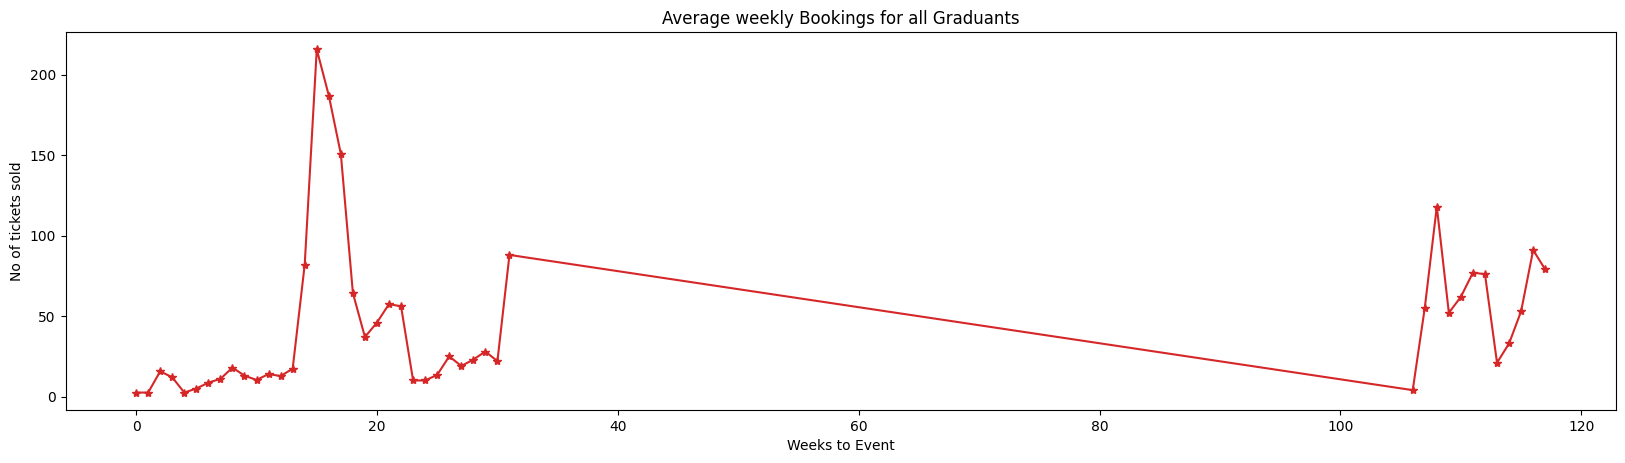

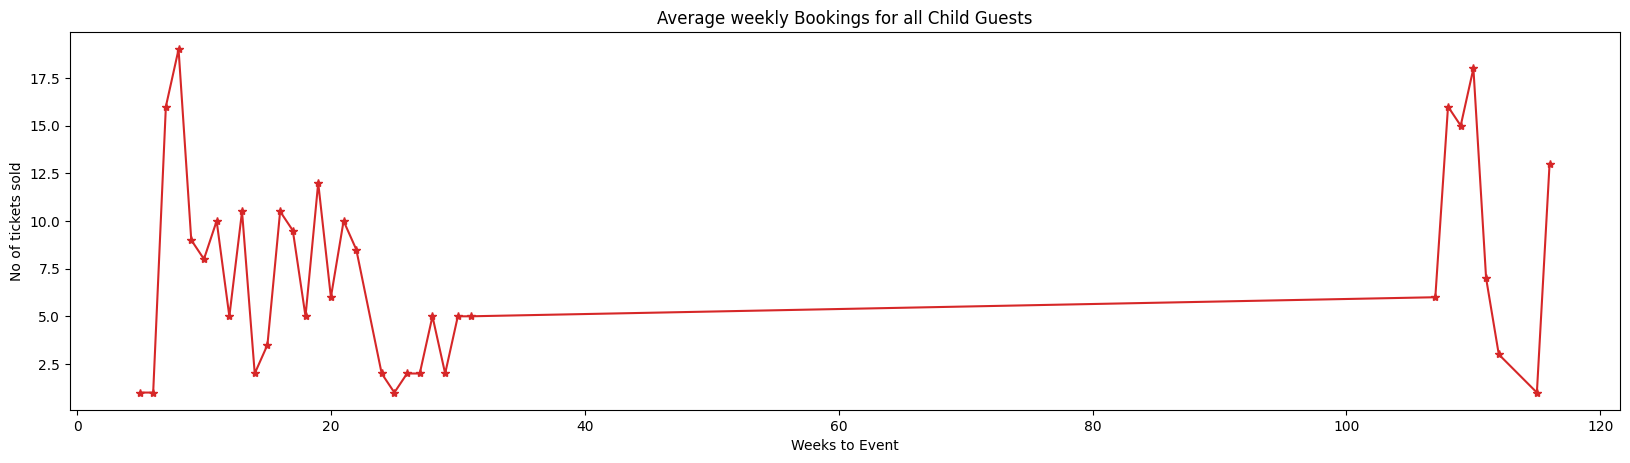

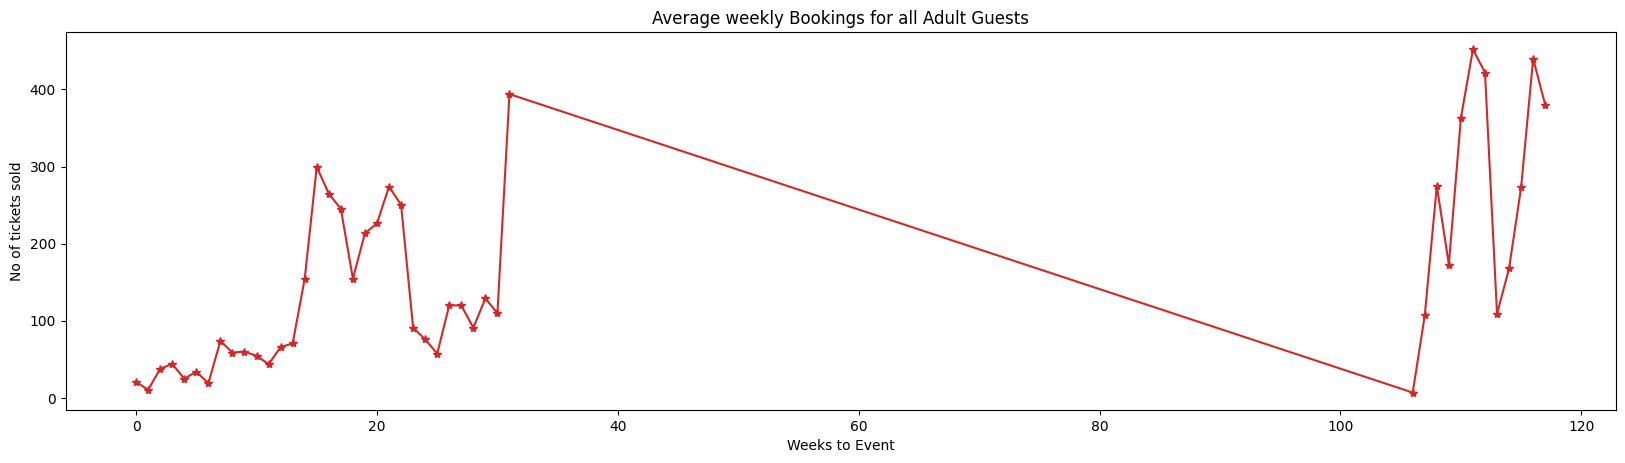

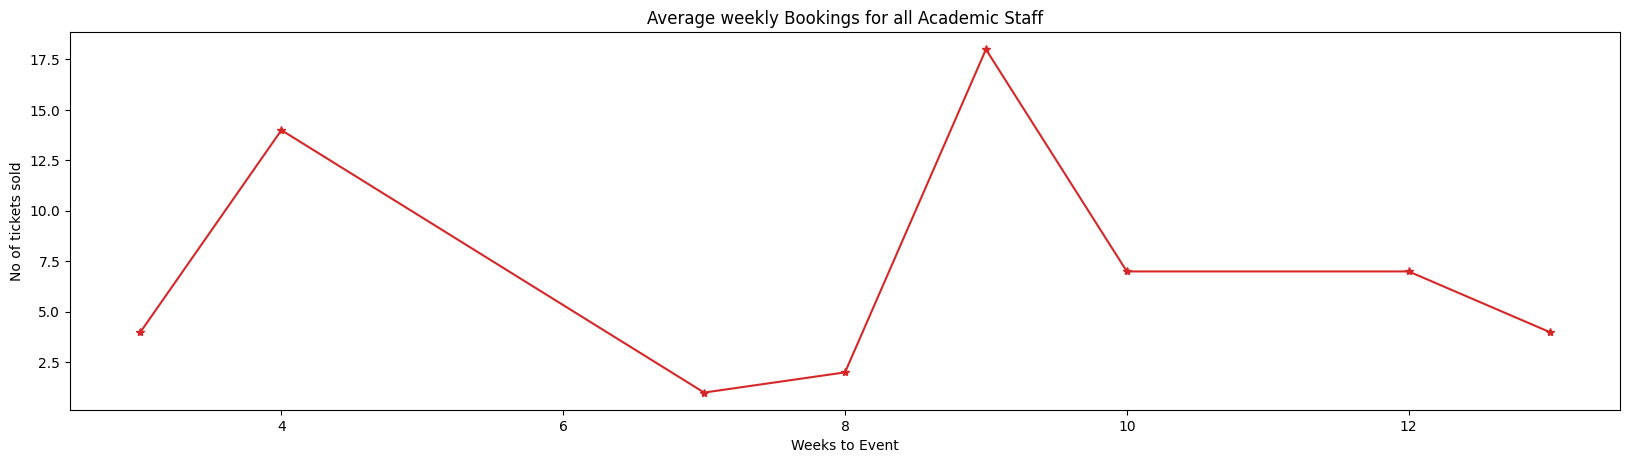

In [ ]:
#Plotting average ticket Booking per season
Graduands_df = Seaons_df[Seaons_df['TicketType'] == 'Graduands'].groupby('BookingWeeksToEvent').mean()
Guest_Child_df = Seaons_df[Seaons_df['TicketType'] == 'Child Guest'].groupby('BookingWeeksToEvent').mean()
Adult_Child_df = Seaons_df[Seaons_df['TicketType'] == 'Adult Guest'].groupby('BookingWeeksToEvent').mean()
Academic_Staff_df = Seaons_df[Seaons_df['TicketType'] == 'Academic Staff'].groupby('BookingWeeksToEvent').mean()

ploting(Graduands_df, Graduands_df.index, Graduands_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Graduands' )
ploting(Guest_Child_df, Guest_Child_df.index, Guest_Child_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Child Guests' )
ploting(Adult_Child_df, Adult_Child_df.index, Adult_Child_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Adult Guests' )
ploting(Academic_Staff_df, Academic_Staff_df.index, Academic_Staff_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Academic Staff' )

# Guest_Child_df.GroupSize.plot(legend=True, figsize=(20,10))

Average first week of Booking per Ticket Type - when tickets starts selling

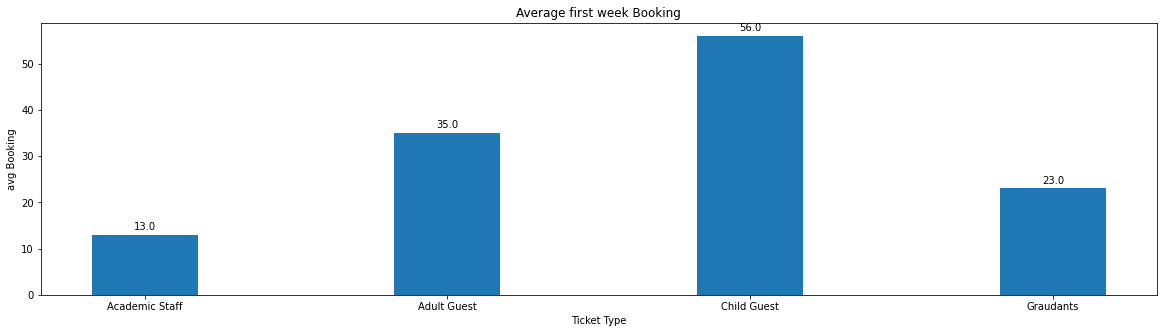

In [ ]:
first_Booking = result_df.groupby(['TicketType']).aggregate({'FirstBookingWeek':'mean'}).reset_index()
first_Booking['FirstBookingWeek'] = round(first_Booking['FirstBookingWeek'])
plotbar(first_Booking['TicketType'], first_Booking['FirstBookingWeek'], 'Ticket Type', 'avg Booking',  'Average first week Booking')

Average last week ticket Booking

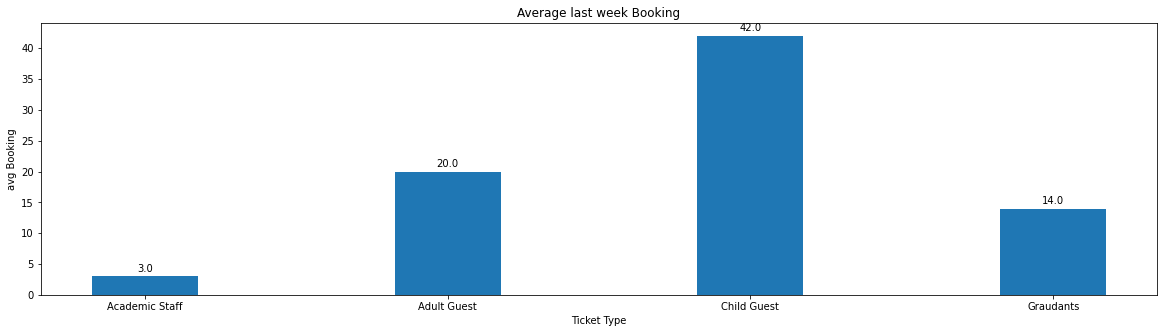

In [ ]:
last_Booking = result_df.groupby(['TicketType']).aggregate({'LastBookingWeek':'mean'}).reset_index()
last_Booking['LastBookingWeek'] = round(last_Booking['LastBookingWeek'])
plotbar(last_Booking['TicketType'], last_Booking['LastBookingWeek'], 'Ticket Type', 'avg Booking',  'Average last week Booking')

Average total weeks to sell tikcets

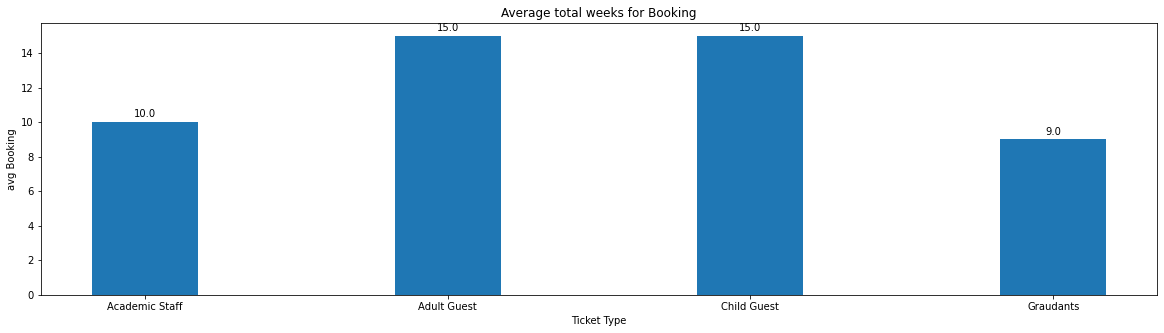

In [ ]:
total_Booking = result_df.groupby(['TicketType']).aggregate({'TotalBookingWeeks':'mean'}).reset_index()
total_Booking['TotalWeeksToSell'] = round(total_Booking['TotalBookingWeeks'])
plotbar(total_Booking['TicketType'], round(total_Booking['TotalBookingWeeks'],0), 'Ticket Type', 'avg Booking',  'Average total weeks for Booking')